In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
# import timeit
# import sys
# sys.path.insert(0, '../src')

# %load_ext autoreload
# %autoreload 2
# from src import modules

In [2]:
annual_crime = pd.read_pickle('../data/pickled/annual_crime.pkl')
monthly_crime = pd.read_pickle('../data/pickled/monthly_crime.pkl')

In [3]:
annual_crime.head()

,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,624.935484,580.225806,572.838710,536.645161,517.709677,586.774194,609.064516,625.580645,617.129032
1,571.392857,523.607143,528.172414,501.321429,487.892857,570.750000,596.000000,609.178571,608.000000
2,584.096774,545.870968,534.290323,521.838710,502.451613,579.451613,587.870968,623.741935,610.161290
3,591.600000,547.333333,542.533333,523.300000,513.466667,563.466667,619.000000,622.766667,634.200000
4,570.935484,545.903226,563.483871,534.612903,538.548387,577.096774,612.967742,624.709677,639.419355


In [4]:
monthly_crime.head()

,crime_count
Date,
2010-01-01,624.935484
2010-02-01,571.392857
2010-03-01,584.096774
2010-04-01,591.600000
2010-05-01,570.935484


### Modeling on monthly crime dataframe

#### Trend Analysis in Data

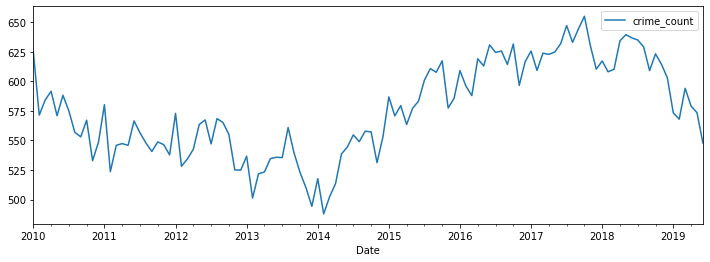

In [5]:
monthly_crime.plot(figsize=(12,4))

From the plot, there seems to be a some periodic trend and some seasonality, also a trend that goes up from 2014 to 2018 and a falling trend from there on. Although, we only have data on the first eight months of 2019, data collection during 2019 seems to be lacking or there truly was falling numbers of crime

Due to the presence of trend, our data is not stationary, the mean is defintely not constant. We can look at the rolling statistics (rolling mean and roilling standard deviation) to confirm.

#### Rolling statistics

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean at any point in time **$t$**, we can take the average/variance of the **$w$** last time periods. **$w$** is then known as the window size.

In [6]:
roll_mean = monthly_crime.rolling(window=8, center=False).mean()
roll_std = monthly_crime.rolling(window=8, center=False).std()

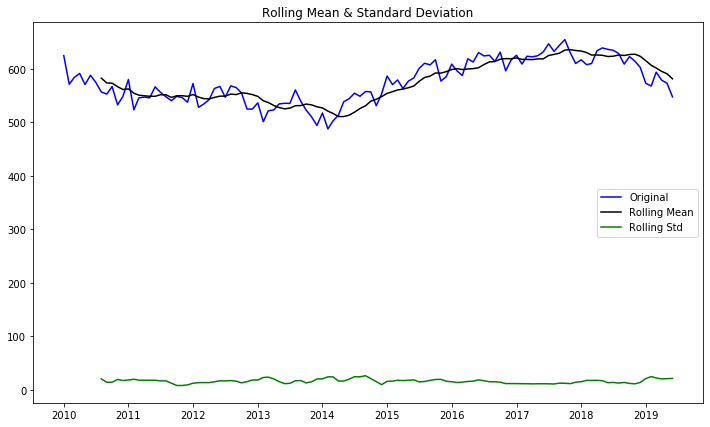

In [7]:
fig = plt.figure(figsize=(12,7))
plt.plot(monthly_crime, color='blue', label='Original')
plt.plot(roll_mean, color='black', label='Rolling Mean')
plt.plot(roll_std, color='green', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

The black and green lines represent the rolling mean and rolling standard deviations. In the plot we can see that mean is not constant over time, so we can confirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error.

In [8]:
X = monthly_crime['crime_count']
X = X[np.logical_not(np.isnan(X))]
split = round(len(X) / 2)
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=546.127441, mean2=605.584653
variance1=646.720180, variance2=750.762978


As you can see the mean is not constant and the variance is also changing

In [9]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(monthly_crime)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.861812
p-value                          0.350234
#Lags Used                      13.000000
Number of Observations Used    100.000000
Critical Value (1%)             -3.497501
Critical Value (5%)             -2.890906
Critical Value (10%)            -2.582435
dtype: float64

At a 95% confidence, we fail to reject the null that the monthly crime data is not stationary.

In [10]:
monthly_crime.index

DatetimeIndex(['2010-01-01', '2010-02-01', '2010-03-01', '2010-04-01',
               '2010-05-01', '2010-06-01', '2010-07-01', '2010-08-01',
               '2010-09-01', '2010-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-06-01'],
              dtype='datetime64[ns]', name='Date', length=114, freq='MS')

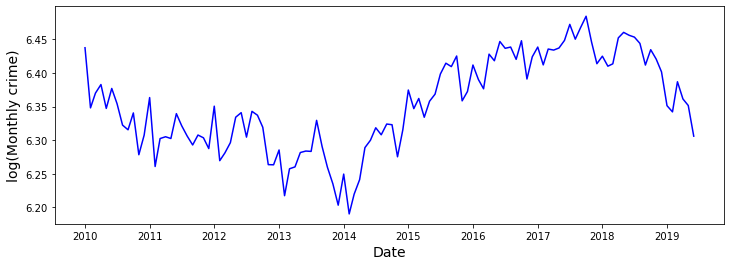

In [11]:
data = pd.Series(np.log(monthly_crime.crime_count), index=monthly_crime.index)
fig = plt.figure(figsize=(12,4))
plt.plot(data, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log(Monthly crime)', fontsize=14)
plt.show()

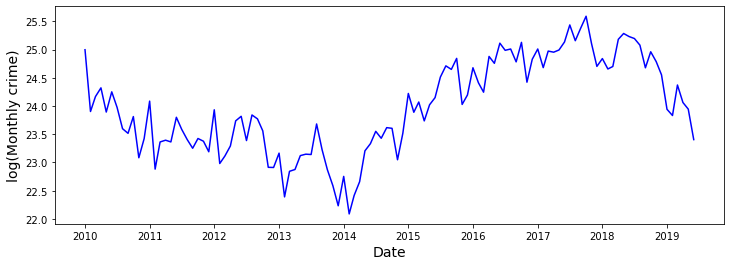

In [12]:
data1 = pd.Series(np.sqrt(monthly_crime.crime_count), index=monthly_crime.index)
fig = plt.figure(figsize=(12,4))
plt.plot(data1, color='blue')
plt.xlabel('Date', fontsize=14)
plt.ylabel('log(Monthly crime)', fontsize=14)
plt.show()

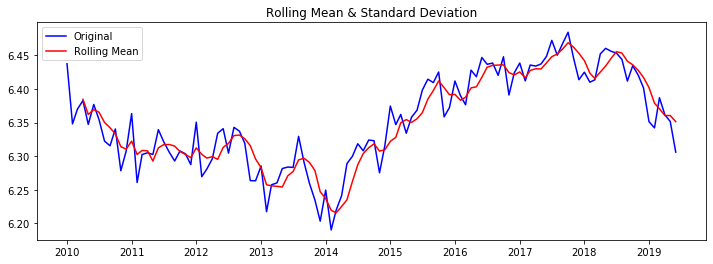

In [13]:
roll_mean = data.rolling(window=4).mean()
fig = plt.figure(figsize=(12,4))
plt.plot(data, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [14]:
# Subtract the moving average from the original data
data_minus_roll_mean = data - roll_mean
data_minus_roll_mean.head(15)

Date
2010-01-01         NaN
2010-02-01         NaN
2010-03-01         NaN
2010-04-01   -0.001825
2010-05-01   -0.014786
2010-06-01    0.007714
2010-07-01   -0.011086
2010-08-01   -0.027842
2010-09-01   -0.026851
2010-10-01    0.007381
2010-11-01   -0.035882
2010-12-01   -0.002966
2011-01-01    0.041000
2011-02-01   -0.041729
2011-03-01   -0.006116
Freq: MS, Name: crime_count, dtype: float64

In [15]:
data_minus_roll_mean.dropna(inplace=True)

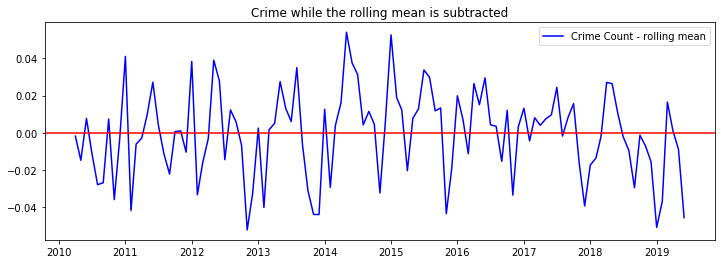

In [16]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_minus_roll_mean, color='blue',label='Crime Count - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Crime while the rolling mean is subtracted')
plt.show(block=False)

In [17]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -1.319125
p-value                         0.620378
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

p value is greater than p critical at 0.05. Fail to Reject null of Not Stationary. The rolling mean subtracted log crime count data is not stationary

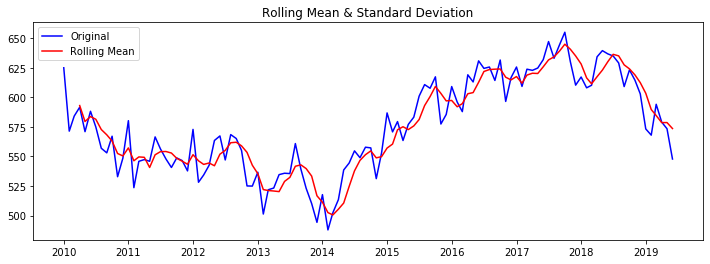

In [18]:
roll_mean = monthly_crime.rolling(window=4).mean()
fig = plt.figure(figsize=(12,4))
plt.plot(monthly_crime, color='blue',label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [19]:
# Subtract the moving average from the original data
data_minus_roll_mean = monthly_crime - roll_mean
data_minus_roll_mean.head(10)

,crime_count
Date,
2010-01-01,NaN
2010-02-01,NaN
2010-03-01,NaN
2010-04-01,-1.406279
2010-05-01,-8.570795
2010-06-01,4.466935
2010-07-01,-6.473925
2010-08-01,-15.831989
2010-09-01,-15.226344


In [20]:
data_minus_roll_mean.dropna(inplace=True)

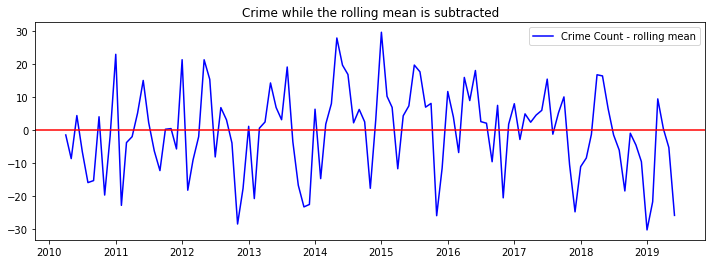

In [21]:
fig = plt.figure(figsize=(12,4))
plt.plot(data_minus_roll_mean, color='blue',label='Crime Count - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Crime while the rolling mean is subtracted')
plt.show(block=False)

In [22]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(data_minus_roll_mean)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                 -1.194470
p-value                         0.675970
#Lags Used                     12.000000
Number of Observations Used    98.000000
Critical Value (1%)            -3.498910
Critical Value (5%)            -2.891516
Critical Value (10%)           -2.582760
dtype: float64

Logged and non logged has no effect once using the rolling mean subtraction. Still not stationary.

In [23]:
crime_diff = monthly_crime.diff(periods=1)
crime_diff.head(10)

,crime_count
Date,
2010-01-01,NaN
2010-02-01,-53.542627
2010-03-01,12.703917
2010-04-01,7.503226
2010-05-01,-20.664516
2010-06-01,17.231183
2010-07-01,-13.231183
2010-08-01,-18.032258
2010-09-01,-3.869892


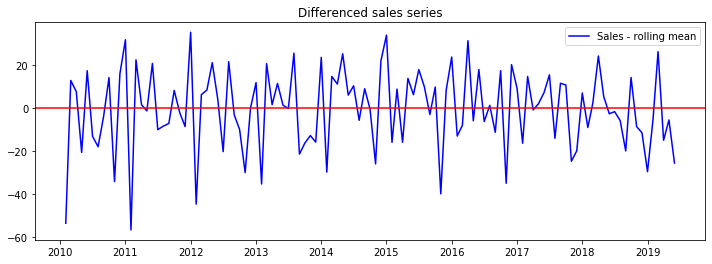

In [24]:
fig = plt.figure(figsize=(12,4))
plt.plot(crime_diff, color='blue',label='Sales - rolling mean')
plt.axhline(y=0, color='r', linestyle='-')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [25]:
crime_diff.dropna(inplace=True)

In [26]:
from statsmodels.tsa.stattools import adfuller

dftest = adfuller(crime_diff)

# Extract and display test results in a user friendly manner
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
dfoutput

Test Statistic                  -1.675236
p-value                          0.443915
#Lags Used                      11.000000
Number of Observations Used    101.000000
Critical Value (1%)             -3.496818
Critical Value (5%)             -2.890611
Critical Value (10%)            -2.582277
dtype: float64

### Seasonal Decomposition

Breaking down the changes over time in trend, seasonality and residual (random/noise)

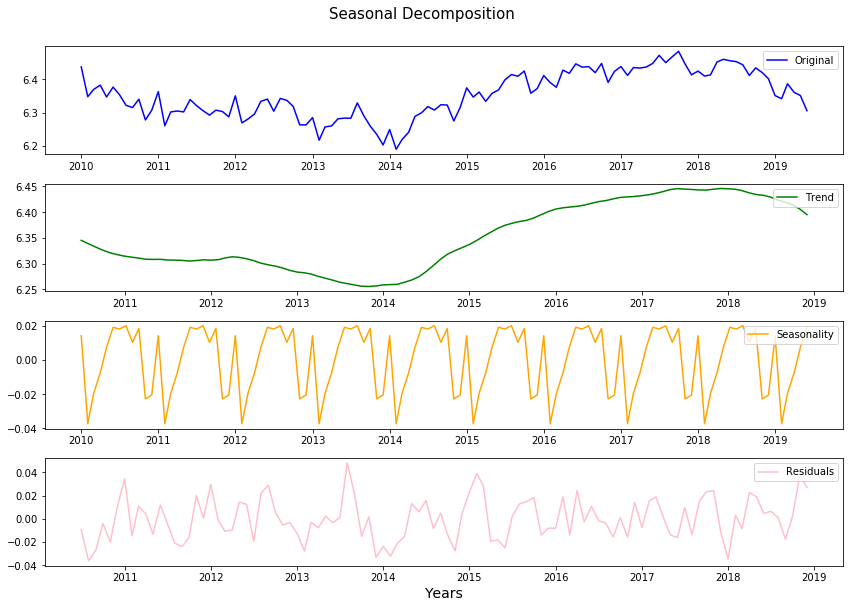

In [27]:
# Importing seasonal decompose object
from statsmodels.tsa.seasonal import seasonal_decompose

# Instantiating decomposition object
decomposition = seasonal_decompose(np.log(monthly_crime))

# Gather the trend, seasonality, and residuals for the monthly crime data
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot gathered statistics
plt.figure(figsize=(12,8))
plt.suptitle('Seasonal Decomposition', y = 1.05, size = 15)

#plotting original data in a subplot and showing legend
plt.subplot(411)
plt.plot(np.log(monthly_crime), label='Original', color='blue')
plt.legend(loc=1)

#plotting decomposed trend in a subplot and showing legend
plt.subplot(412)
plt.plot(trend, label='Trend', color='green')
plt.legend(loc=1)

#plotting decomposed seasonality in a subplot and showing legend
plt.subplot(413)
plt.plot(seasonal,label='Seasonality', color='orange')
plt.legend(loc=1)
plt.subplot(414)

#plotting decomposed residual or noise in a subplot and showing legend
plt.plot(residual, label='Residuals', color='pink')
plt.xlabel('Years', size = 14)
plt.legend(loc=1)
plt.tight_layout()

plt.savefig('../visualizations/LA Crime- Time Series Seasonal Decomposition')

In [28]:
def stationarity_check(TS):
    
    # Import adfuller
    from statsmodels.tsa.stattools import adfuller
    
    # Calculate rolling statistics
    roll_mean = TS.rolling(window=8, center=False).mean()
    roll_std = TS.rolling(window=8, center=False).std()
    
    # Perform the Dickey Fuller test
    dftest = adfuller(TS) 
    
    # Plot rolling statistics:
    fig = plt.figure(figsize=(12,6))
    orig = plt.plot(TS, color='blue',label='Original')
    mean = plt.plot(roll_mean, color='red', label='Rolling Mean')
    std = plt.plot(roll_std, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    # Print Dickey-Fuller test results
    print('Results of Dickey-Fuller Test: \n')

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', 
                                             '#Lags Used', 'Number of Observations Used'])
    for key, value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)
    
    return None

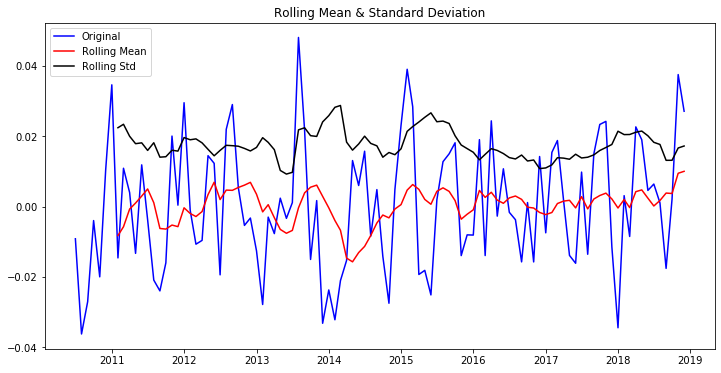

Results of Dickey-Fuller Test: 

Test Statistic                -6.995909e+00
p-value                        7.534967e-10
#Lags Used                     3.000000e+00
Number of Observations Used    9.800000e+01
Critical Value (1%)           -3.498910e+00
Critical Value (5%)           -2.891516e+00
Critical Value (10%)          -2.582760e+00
dtype: float64


In [29]:
# Drop missing values from residuals 
crime_log_decompose = residual
crime_log_decompose.dropna(inplace=True)

# Check stationarity
stationarity_check(crime_log_decompose)

Residuals are stationary at a 95% confidence

>The p statistic is significant and below 0.05 . So it seems reasonable to assume this time series is stationary.

*"In time series context, residuals must be stationary in order to avoid spurious regressions (Woolridge, 2012), if there are no properties of
stationarity among the residuals, then basically our results tend to produce
fake relationships in our model."*

#### Comparing the crime count time series, with the time series of a lag of one

In [30]:
crime_shift_1 = monthly_crime.shift(periods=1)
lag_1 = pd.concat([crime_shift_1, monthly_crime], axis=1)
lag_1.corr()

,crime_count,crime_count
crime_count,1.00000,0.88922
crime_count,0.88922,1.00000


In [31]:
for i in range(1,14):
    crime_shift = monthly_crime.shift(periods=i)
    lag = pd.concat([crime_shift, monthly_crime], axis=1)
    print('lag {}'.format(i), lag.corr())

lag 1              crime_count  crime_count
crime_count      1.00000      0.88922
crime_count      0.88922      1.00000
lag 2              crime_count  crime_count
crime_count     1.000000     0.857452
crime_count     0.857452     1.000000
lag 3              crime_count  crime_count
crime_count     1.000000     0.839176
crime_count     0.839176     1.000000
lag 4              crime_count  crime_count
crime_count     1.000000     0.786284
crime_count     0.786284     1.000000
lag 5              crime_count  crime_count
crime_count     1.000000     0.759595
crime_count     0.759595     1.000000
lag 6              crime_count  crime_count
crime_count     1.000000     0.726668
crime_count     0.726668     1.000000
lag 7              crime_count  crime_count
crime_count     1.000000     0.711975
crime_count     0.711975     1.000000
lag 8              crime_count  crime_count
crime_count     1.000000     0.689913
crime_count     0.689913     1.000000
lag 9              crime_count  crime_co

autocorrelation highest at lag 2 and lag 13 also visible in the peaks in the autocorrelation plot below

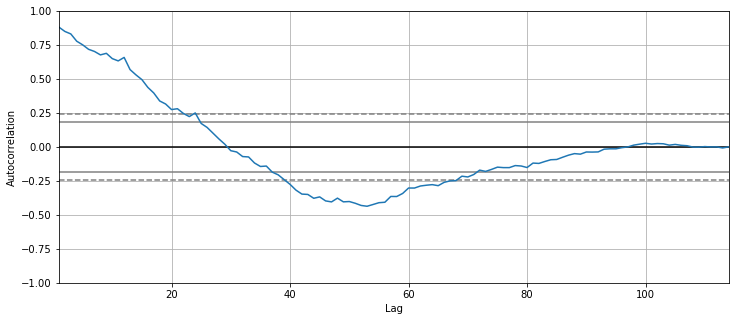

In [32]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(monthly_crime);

From the plot, we can see that there are peaks at intervals of 12. The statistical significance falls around 15 to 16 lags.

MA(k)--- ACF strong autocorrelation till lag 16, with peaks at lag 2 and 12

AR(k)--- ACF stong to a lag of 12

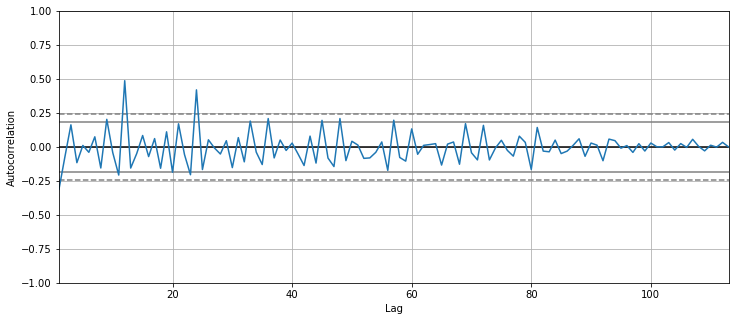

In [33]:
plt.figure(figsize=(12,5))
pd.plotting.autocorrelation_plot(crime_diff);

The ACF on the (1)differenced data seems a little more stable, revolving around 0. Additionally, the autocorrelation for multiples of 12 seems consistently statistically significant, while it decays for longer time lags!

We would expect the ACF for the MA(k) process to show a strong correlation with recent values up to the lag of k, then a sharp decline to low or no correlation. MA(k), k 60?

we would expect the ACF for the AR(k) process to be strong to a lag of k and the inertia of that relationship would carry on to subsequent lag values, trailing off at some point as the effect is weakened.--- strong to a lag of 48 or 60?

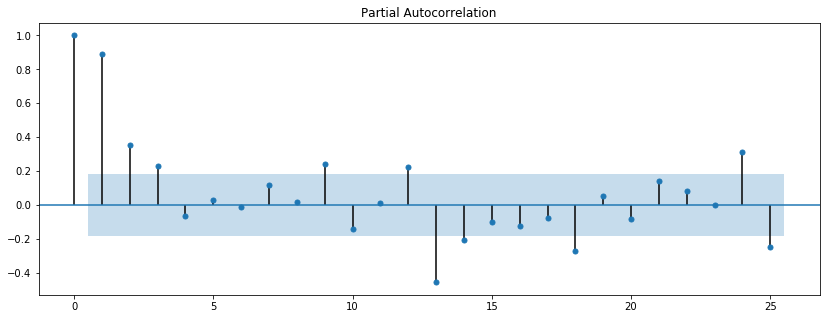

In [34]:
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib.pylab import rcParams

rcParams['figure.figsize'] = 14, 5

plot_pacf(monthly_crime, lags=25);

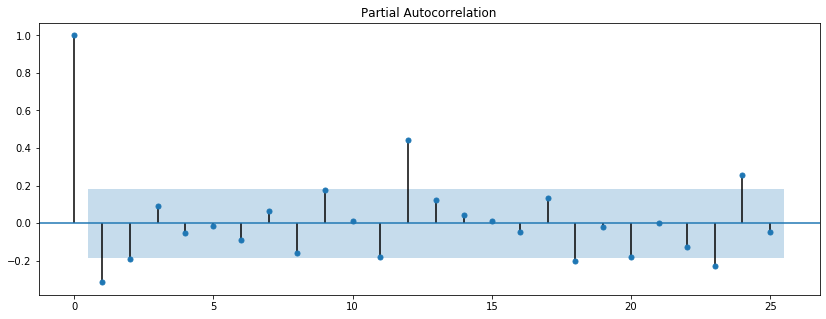

In [35]:
plot_pacf(crime_diff, lags=25);

### AR Model--- ARMA(#,0)

In [36]:
# Import ARMA
from statsmodels.tsa.arima_model import ARMA
import statsmodels.api as sm

# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(1, 0)   Log Likelihood                -492.921
Method:                       css-mle   S.D. of innovations             18.139
Date:                Tue, 08 Dec 2020   AIC                            991.843
Time:                        00:32:10   BIC                           1000.051
Sample:                    01-01-2010   HQIC                           995.174
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               577.1548     14.364     40.180      0.000     549.001     605.309
ar.L1.crime_count     0.8892      0.042     21.322      0.000       0.807       0.971
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.1246           +0.0000j            1.1246            0.0000
-----------------------------------------------------------------------------
"""

In [37]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(2, 0)   Log Likelihood                -487.909
Method:                       css-mle   S.D. of innovations             17.348
Date:                Tue, 08 Dec 2020   AIC                            983.819
Time:                        00:32:10   BIC                            994.763
Sample:                    01-01-2010   HQIC                           988.261
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               577.3190     17.683     32.649      0.000     542.662     611.976
ar.L1.crime_count     0.6162      0.093      6.615      0.000       0.434       0.799
ar.L2.crime_count     0.3019      0.093      3.242      0.001       0.119       0.484
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0660           +0.0000j            1.0660            0.0000
AR.2           -3.1072           +0.0000j            3.1072            0.5000
-----------------------------------------------------------------------------
"""

In [38]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(12,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                    ARMA(12, 0)   Log Likelihood                -479.177
Method:                       css-mle   S.D. of innovations             15.974
Date:                Tue, 08 Dec 2020   AIC                            986.353
Time:                        00:32:16   BIC                           1024.660
Sample:                    01-01-2010   HQIC                          1001.900
                         - 06-01-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                578.5147     20.667     27.992      0.000     538.008     619.022
ar.L1.crime_count      0.6161      0.095      6.473      0.000       0.430       0.803
ar.L2.crime_count      0.1707      0.112      1.528      0.127      -0.048       0.390
ar.L3.crime_count      0.2353      0.111      2.115      0.034       0.017       0.453
ar.L4.crime_count     -0.1384      0.113     -1.223      0.221      -0.360       0.083
ar.L5.crime_count      0.0148      0.116      0.128      0.898      -0.212       0.242
ar.L6.crime_count     -0.1103      0.113     -0.979      0.328      -0.331       0.111
ar.L7.crime_count      0.1224      0.114      1.072      0.284      -0.101       0.346
ar.L8.crime_count     -0.0677      0.115     -0.590      0.555      -0.293       0.157
ar.L9.crime_count      0.2357      0.113      2.078      0.038       0.013       0.458
ar.L10.crime_count    -0.2096      0.114     -1.832      0.067      -0.434       0.015
ar.L11.crime_count    -0.1402      0.115     -1.217      0.224      -0.366       0.086
ar.L12.crime_count     0.2133      0.099      2.160      0.031       0.020       0.407
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
AR.1            -0.9671           -0.5200j            1.0980           -0.4215
AR.2            -0.9671           +0.5200j            1.0980            0.4215
AR.3            -1.3810           -0.0000j            1.3810           -0.5000
AR.4            -0.5081           -0.9454j            1.0733           -0.3285
AR.5            -0.5081           +0.9454j            1.0733            0.3285
AR.6             0.0884           -1.0998j            1.1034           -0.2372
AR.7             0.0884           +1.0998j            1.1034            0.2372
AR.8             0.7844           -0.8860j            1.1833           -0.1347
AR.9             0.7844           +0.8860j            1.1833            0.1347
AR.10            1.1072           -0.4097j            1.1806           -0.0564
AR.11            1.1072           +0.4097j            1.1806            0.0564
AR.12            1.0286           -0.0000j            1.0286           -0.0000
------------------------------------------------------------------------------
"""

In [39]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(1,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(1, 0)   Log Likelihood                -484.626
Method:                       css-mle   S.D. of innovations             17.624
Date:                Tue, 08 Dec 2020   AIC                            975.251
Time:                        00:32:19   BIC                            983.433
Sample:                    02-01-2010   HQIC                           978.572
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.5072      1.241     -0.409      0.683      -2.940       1.925
ar.L1.crime_count    -0.3395      0.093     -3.669      0.000      -0.521      -0.158
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.9457           +0.0000j            2.9457            0.5000
-----------------------------------------------------------------------------
"""

In [40]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(2,0))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(2, 0)   Log Likelihood                -482.233
Method:                       css-mle   S.D. of innovations             17.248
Date:                Tue, 08 Dec 2020   AIC                            972.466
Time:                        00:32:19   BIC                            983.376
Sample:                    02-01-2010   HQIC                           976.893
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4261      1.006     -0.424      0.672      -2.398       1.546
ar.L1.crime_count    -0.4096      0.096     -4.263      0.000      -0.598      -0.221
ar.L2.crime_count    -0.2118      0.096     -2.213      0.027      -0.399      -0.024
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9669           -1.9458j            2.1728           -0.3234
AR.2           -0.9669           +1.9458j            2.1728            0.3234
-----------------------------------------------------------------------------
"""

In [41]:
## Instantiate an AR(1) model to the simulated data
# mod_arma = ARMA(crime_diff, order=(12,0))
# res_arma = mod_arma.fit()
# res_arma.summary()

## Did not converge at p=12

## MA Models == ARMA(0, #)

In [42]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(0, 1)   Log Likelihood                -538.142
Method:                       css-mle   S.D. of innovations             27.058
Date:                Tue, 08 Dec 2020   AIC                           1082.283
Time:                        00:32:19   BIC                           1090.492
Sample:                    01-01-2010   HQIC                          1085.615
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               575.9599      4.420    130.307      0.000     567.297     584.623
ma.L1.crime_count     0.7507      0.052     14.405      0.000       0.649       0.853
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.3321           +0.0000j            1.3321            0.5000
-----------------------------------------------------------------------------
"""

In [43]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,2))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                     ARMA(0, 2)   Log Likelihood                -525.194
Method:                       css-mle   S.D. of innovations             24.151
Date:                Tue, 08 Dec 2020   AIC                           1058.389
Time:                        00:32:19   BIC                           1069.333
Sample:                    01-01-2010   HQIC                          1062.830
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               576.2458      5.125    112.446      0.000     566.202     586.290
ma.L1.crime_count     0.8519      0.091      9.347      0.000       0.673       1.030
ma.L2.crime_count     0.4283      0.069      6.184      0.000       0.293       0.564
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -0.9944           -1.1601j            1.5279           -0.3628
MA.2           -0.9944           +1.1601j            1.5279            0.3628
-----------------------------------------------------------------------------
"""

In [44]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(monthly_crime, order=(0,12))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  114
Model:                    ARMA(0, 12)   Log Likelihood                -480.095
Method:                       css-mle   S.D. of innovations             15.990
Date:                Tue, 08 Dec 2020   AIC                            988.189
Time:                        00:32:29   BIC                           1026.496
Sample:                    01-01-2010   HQIC                          1003.736
                         - 06-01-2019                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                575.8321      9.528     60.434      0.000     557.157     594.507
ma.L1.crime_count      0.6796      0.100      6.826      0.000       0.484       0.875
ma.L2.crime_count      0.6770      0.132      5.126      0.000       0.418       0.936
ma.L3.crime_count      0.7998      0.157      5.082      0.000       0.491       1.108
ma.L4.crime_count      0.6701      0.175      3.840      0.000       0.328       1.012
ma.L5.crime_count      0.5331      0.183      2.914      0.004       0.174       0.892
ma.L6.crime_count      0.5263      0.184      2.858      0.004       0.165       0.887
ma.L7.crime_count      0.4669      0.161      2.904      0.004       0.152       0.782
ma.L8.crime_count      0.2665      0.138      1.926      0.054      -0.005       0.538
ma.L9.crime_count      0.3320      0.111      2.979      0.003       0.114       0.550
ma.L10.crime_count     0.0754      0.098      0.767      0.443      -0.117       0.268
ma.L11.crime_count     0.1919      0.137      1.402      0.161      -0.076       0.460
ma.L12.crime_count     0.3812      0.110      3.455      0.001       0.165       0.597
                                    Roots                                     
==============================================================================
                   Real          Imaginary           Modulus         Frequency
------------------------------------------------------------------------------
MA.1            -1.0951           -0.2063j            1.1144           -0.4704
MA.2            -1.0951           +0.2063j            1.1144            0.4704
MA.3            -0.7872           -0.6738j            1.0361           -0.3873
MA.4            -0.7872           +0.6738j            1.0361            0.3873
MA.5            -0.3040           -1.0255j            1.0696           -0.2959
MA.6            -0.3040           +1.0255j            1.0696            0.2959
MA.7             0.2141           -1.0145j            1.0368           -0.2169
MA.8             0.2141           +1.0145j            1.0368            0.2169
MA.9             0.6820           -0.8377j            1.0802           -0.1413
MA.10            0.6820           +0.8377j            1.0802            0.1413
MA.11            1.0384           -0.5411j            1.1710           -0.0765
MA.12            1.0384           +0.5411j            1.1710            0.0765
------------------------------------------------------------------------------
"""

In [45]:
# Instantiate an AR(1) model to the simulated data
mod_arma = ARMA(crime_diff, order=(0,1))
res_arma = mod_arma.fit()
res_arma.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:            crime_count   No. Observations:                  113
Model:                     ARMA(0, 1)   Log Likelihood                -483.044
Method:                       css-mle   S.D. of innovations             17.374
Date:                Tue, 08 Dec 2020   AIC                            972.089
Time:                        00:32:31   BIC                            980.271
Sample:                    02-01-2010   HQIC                           975.409
                         - 06-01-2019                                         
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                -0.4108      0.983     -0.418      0.676      -2.336       1.515
ma.L1.crime_count    -0.4036      0.089     -4.534      0.000      -0.578      -0.229
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1            2.4776           +0.0000j            2.4776            0.0000
-----------------------------------------------------------------------------
"""

## SARIMAX MODEL

In [46]:
monthly_crime.tail()

,crime_count
Date,
2019-02-01,568.000000
2019-03-01,594.064516
2019-04-01,579.033333
2019-05-01,573.419355
2019-06-01,547.818182


In [47]:
X = monthly_crime.index
y = monthly_crime['crime_count']

train_set = monthly_crime.loc['2010-01-01':'2017-12-31']
test_set = monthly_crime.loc['2018-01-01' : ]

X_train, X_test = train_set.index , test_set.index
y_train, y_test = train_set['crime_count'] , test_set['crime_count']

In [59]:
import itertools

# Define the p, d and q parameters to take any value between 0 and 2
p = d = q = range(0, 3)

# Generate all different combinations of p, q and q triplets
pdq = list(itertools.product(p, d, q))

# Generate all different combinations of seasonal p, q and q triplets
pdqs = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

In [61]:
# Run a grid with pdq and seasonal pdq parameters calculated above and get the best AIC value
ans = []
for comb in pdq:
    for combs in pdqs:
        try:
            mod = sm.tsa.statespace.SARIMAX(y_train,
                                            order=comb,
                                            seasonal_order=combs,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)

            output = mod.fit()
            ans.append([comb, combs, output.aic])
            print('ARIMA {} x {}12 : AIC Calculated ={}'.format(comb, combs, output.aic))
        except:
            continue

ARIMA (0, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =1477.6381075974343
ARIMA (0, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =1211.8822660814828


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =3097.4745823274566
ARIMA (0, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =806.0734355902617
ARIMA (0, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =691.2271270825805


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =2483.3618512383287
ARIMA (0, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =724.5734897067297
ARIMA (0, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =594.0573129329457


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


ARIMA (0, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =482.638992069573
ARIMA (0, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =813.1813071244336
ARIMA (0, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =801.830319202848


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =1949.3492166054546
ARIMA (0, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =699.7160025526722
ARIMA (0, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =692.6875128210897


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =1611.8701081843703
ARIMA (0, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =608.3666046945385
ARIMA (0, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =595.8138046292443
ARIMA (0, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =479.3855415728261
ARIMA (0, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =689.9847876041399
ARIMA (0, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =672.6431769696599
ARIMA (0, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =664.3073846005404
ARIMA (0, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =593.8168804478105
ARIMA (0, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =594.1299073110177


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =586.6796905975967
ARIMA (0, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =489.35793399647855
ARIMA (0, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =488.82756230260946
ARIMA (0, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =480.4594966462175
ARIMA (0, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =1340.6460738098592
ARIMA (0, 0, 1) x (0, 0, 1, 12)12 : AIC Calculated =1092.1546810837388


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:390: RuntimeWarning: invalid value encountered in less
  if np.any((x0 < lb) | (x0 > ub)):
/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:390: RuntimeWarning: invalid value encountered in greater
  if np.any((x0 < lb) | (x0 > ub)):
/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/optimize/_numdiff.py:405: RuntimeWarning: invalid value encountered in greater_equal
  sign_x0 = (x0 >= 0).astype(float) * 2 - 1
/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =nan
ARIMA (0, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =747.9669260247917
ARIMA (0, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =646.3274116629087


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =1674.894491590908
ARIMA (0, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =685.6928287727625
ARIMA (0, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =556.5449636596276
ARIMA (0, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =450.61936502005267
ARIMA (0, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =767.5838890841351
ARIMA (0, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =748.1620856132771
ARIMA (0, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =4816.549157006378
ARIMA (0, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =662.9178888511781
ARIMA (0, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =647.7765053016957
ARIMA (0, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =4696.37082974539
ARIMA (0, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =579.8421638538142
ARIMA (0, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =557.614488415788
ARIMA (0, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =449.1936924284593
ARIMA (0, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =656.7470712603584


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =670.6325917697766


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =654.4302203937608
ARIMA (0, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =562.9046701808585
ARIMA (0, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =563.6181263161058
ARIMA (0, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =547.6976816098773
ARIMA (0, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =469.01677672612806
ARIMA (0, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =470.751618984017
ARIMA (0, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =450.80543939059567
ARIMA (0, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =1229.1300845371106
ARIMA (0, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =1004.0735993353837
ARIMA (0, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =nan


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =717.507651933485
ARIMA (0, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =616.4343376791486


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =1136.645557221047
ARIMA (0, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =665.7640757282722
ARIMA (0, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =532.0049391252669
ARIMA (0, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =426.21584252866734
ARIMA (0, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =746.2964700016213


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =719.4796634783396


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =4531.81286269219
ARIMA (0, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =641.3513688248181
ARIMA (0, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =616.8590155776055
ARIMA (0, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =4420.0309975053515
ARIMA (0, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =557.4562080789118
ARIMA (0, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =532.7855441659563
ARIMA (0, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =424.17226047978886


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =637.044500832527


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =639.5912671410682


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =628.2807407419015
ARIMA (0, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =535.6250021696372
ARIMA (0, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =536.3271025678625
ARIMA (0, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =511.2632992147514
ARIMA (0, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =453.90279507073785
ARIMA (0, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =451.14248666073206
ARIMA (0, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =423.2536904794478
ARIMA (0, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =817.9801453408395
ARIMA (0, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =689.6977473757177


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =1521.7682394546955
ARIMA (0, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =698.6280814744182
ARIMA (0, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =583.2940705473569


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =1975.8141000207954
ARIMA (0, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =670.9345730441835
ARIMA (0, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =518.7992167283641
ARIMA (0, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =411.7426435539416
ARIMA (0, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =683.6705535735233
ARIMA (0, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =668.2686166105806
ARIMA (0, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =4525.343276995078
ARIMA (0, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =593.0341876143196
ARIMA (0, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =584.3805837854832


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =1369.393715311227
ARIMA (0, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =527.5615058108233
ARIMA (0, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =514.6893837732777
ARIMA (0, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =411.7218735642314
ARIMA (0, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =580.3474703569774
ARIMA (0, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =582.2685750216214


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =863.7930955157923
ARIMA (0, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =490.6687662575537
ARIMA (0, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =490.39579704007315


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =2033.6951620526204
ARIMA (0, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =424.36815747729435
ARIMA (0, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =418.7136251928589
ARIMA (0, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =411.9841661641098
ARIMA (0, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =795.2622708237809
ARIMA (0, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =676.3642021010959


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =1650.4461617678808
ARIMA (0, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =682.9293706579244
ARIMA (0, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =569.1939922708038


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =1322.7533761324441
ARIMA (0, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =657.065483842209
ARIMA (0, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =505.76142398966454
ARIMA (0, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =400.6406633714523
ARIMA (0, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =676.9340534345727
ARIMA (0, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =655.6574176616674


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =nan
ARIMA (0, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =587.943501825424
ARIMA (0, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =569.4090807853717


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =1590.4983108109454
ARIMA (0, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =525.056510573776
ARIMA (0, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =502.824436144253
ARIMA (0, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =401.8158693641972
ARIMA (0, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =577.5223850104508
ARIMA (0, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =578.667069411272


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =2399.416320892705
ARIMA (0, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =485.23100414221454
ARIMA (0, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =483.68587858942556


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =1108.31509586701
ARIMA (0, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =420.8990337691052
ARIMA (0, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =417.8250767408096
ARIMA (0, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =400.4848396386466
ARIMA (0, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =789.498481707928
ARIMA (0, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =670.5305695327411


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =2691.6217183944536
ARIMA (0, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =677.4945857179468
ARIMA (0, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =564.020288193804


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =1245.2773457195667
ARIMA (0, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =650.033883871508
ARIMA (0, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =499.8164360772925
ARIMA (0, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =394.4866682780434
ARIMA (0, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =678.8625253747236
ARIMA (0, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =650.3724941058169


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =nan
ARIMA (0, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =589.92926657702
ARIMA (0, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =564.0826745131739
ARIMA (0, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =2345.064797038213
ARIMA (0, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =526.4483461701408
ARIMA (0, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =496.8393353094629
ARIMA (0, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =395.1995890514547
ARIMA (0, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =579.4915255885547
ARIMA (0, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =580.6008075371199


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =3323.808353835068
ARIMA (0, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =486.733368217657
ARIMA (0, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =485.4070224656266
ARIMA (0, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =476.74743769308026
ARIMA (0, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =422.0749048602788
ARIMA (0, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =417.0501557482538
ARIMA (0, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =395.27011656757566
ARIMA (0, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =902.5726524333969
ARIMA (0, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =754.8319795036491


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =2018.2173367814682
ARIMA (0, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =767.2067883754805
ARIMA (0, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =639.6922503254817


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =1481.0508445036048
ARIMA (0, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =725.1456980866893
ARIMA (0, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =563.924254683431
ARIMA (0, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =446.5276578929794
ARIMA (0, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =751.1136753871939
ARIMA (0, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =733.4364289483827


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =1385.9738401137733
ARIMA (0, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =650.145379002933
ARIMA (0, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =640.9411072514484


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =2629.79647881835
ARIMA (0, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =573.7337659310496
ARIMA (0, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =558.5409377927831
ARIMA (0, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =444.0729089744812
ARIMA (0, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =634.6860511102763
ARIMA (0, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =636.6388781500723


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =1693.0741636044404
ARIMA (0, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =537.9036026274323
ARIMA (0, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =538.4312038308374


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =527.3330422673466
ARIMA (0, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =460.09034611113043
ARIMA (0, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =453.5361081763557
ARIMA (0, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =443.89190434923876
ARIMA (0, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =808.4732757748191
ARIMA (0, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =679.1421564691816


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =2957.6665782119253
ARIMA (0, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =688.4354875305121
ARIMA (0, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =572.6604580462193


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =1749.2226537919032
ARIMA (0, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =657.8896039115943
ARIMA (0, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =507.0869639568227
ARIMA (0, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =399.85591662672044
ARIMA (0, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =682.8577769606364
ARIMA (0, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =659.1529267911692


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =2971.264253748651
ARIMA (0, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =591.8687583374833
ARIMA (0, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =574.6083091950526


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =1556.9374093683323
ARIMA (0, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =525.7009664251318
ARIMA (0, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =504.4710830704988
ARIMA (0, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =401.35940496217705
ARIMA (0, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =579.4186210923675
ARIMA (0, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =581.2332672070884
ARIMA (0, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =5049.235176132475
ARIMA (0, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =486.12354798481795
ARIMA (0, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =488.0511966562759
ARIMA (0, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =470.3412855775598
ARIMA (0, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =422.1080977990188
ARIMA (0, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =418.34688599743066
ARIMA (0, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =404.203633878907
ARIMA (0, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =784.6006405328698
ARIMA (0, 2, 2) x

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =1697.607307978699
ARIMA (0, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =672.4313314666101
ARIMA (0, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =555.7309643353092


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =2209.88708841816
ARIMA (0, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =645.0368492215771
ARIMA (0, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =493.6168404210257


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =388.5601433970092
ARIMA (0, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =676.7188026122293
ARIMA (0, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =646.6320216194904


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =1725.0059143351598
ARIMA (0, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =587.4409608056673
ARIMA (0, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =556.5722601121607


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =2183.970384447323
ARIMA (0, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =523.8067274046065
ARIMA (0, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =490.84422927106294
ARIMA (0, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =390.67648240435665
ARIMA (0, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =577.0399318748293
ARIMA (0, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =579.0231559949109


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (0, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =1792.7768977548826
ARIMA (0, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =482.5435854534696
ARIMA (0, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =479.74429896265775
ARIMA (0, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =458.39794505622604
ARIMA (0, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =418.8823160041451
ARIMA (0, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =413.41275765586136
ARIMA (0, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =384.84753066840403
ARIMA (1, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =835.64689446419
ARIMA (1, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =710.0311082402432


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =1155.4603694107054
ARIMA (1, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =700.6973415871729
ARIMA (1, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =590.50210274494


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =1431.9140804771228
ARIMA (1, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =671.6284934913801
ARIMA (1, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =524.7001431805398
ARIMA (1, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =418.5414966208608
ARIMA (1, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =685.6704009046166
ARIMA (1, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =678.2519285663099


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =1863.0306940469527
ARIMA (1, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =591.878416226221
ARIMA (1, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =592.915002550292


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =1967.8021200767712
ARIMA (1, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =526.1560699375494
ARIMA (1, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =522.2448153369891
ARIMA (1, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =419.13955067604536
ARIMA (1, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =582.3430791171581
ARIMA (1, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =584.3376705994101
ARIMA (1, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =585.1236059805944
ARIMA (1, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =490.3746604900759
ARIMA (1, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =490.69940378906347
ARIMA (1, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =490.215487374258
ARIMA (1, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =424.21125123440714
ARIMA (1, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =419.8568600279093
ARIMA (1, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =417.28195758690305
ARIMA (1, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =805.2052589864732
ARIMA (1, 0, 1) 

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =1387.4989127348642
ARIMA (1, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =688.6647715781569


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =578.4013109070764


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =2231.0899223119873
ARIMA (1, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =662.279535267065
ARIMA (1, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =513.806002209052
ARIMA (1, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =407.98197043037976
ARIMA (1, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =678.6721076956705
ARIMA (1, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =664.7943148906337


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =866.1583611560872
ARIMA (1, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =588.4570605376808
ARIMA (1, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =578.7960009448091


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =2347.3642734107743
ARIMA (1, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =525.2716314613607
ARIMA (1, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =512.7341756346608
ARIMA (1, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =412.52857281571465
ARIMA (1, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =579.3501574119431


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =580.1892486984676


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =575.2544899446364
ARIMA (1, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =486.2180008044269
ARIMA (1, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =485.46107026441933
ARIMA (1, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =478.644013879007
ARIMA (1, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =422.0681940385256
ARIMA (1, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =417.3382598794482


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =408.4239743386852
ARIMA (1, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =799.2191224070204
ARIMA (1, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =679.5476328314505


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =2928.184427767686
ARIMA (1, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =683.1908352519637
ARIMA (1, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =572.8293288047247


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =2158.915122355242
ARIMA (1, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =655.6240318076381
ARIMA (1, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =507.1640826911256
ARIMA (1, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =402.11389271755604
ARIMA (1, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =680.5282137554876
ARIMA (1, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =658.8247236018999


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =1865.499950955644
ARIMA (1, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =590.3613879585137
ARIMA (1, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =572.9525272649861


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =1710.7552725796065
ARIMA (1, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =525.8952389085321
ARIMA (1, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =505.98486954901597
ARIMA (1, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =406.3684308442653
ARIMA (1, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =581.2884320610887


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =583.3519387650249


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =570.241631075527
ARIMA (1, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =487.67747482124054
ARIMA (1, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =487.1823358218362
ARIMA (1, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =472.8126389116148
ARIMA (1, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =422.5981791711091
ARIMA (1, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =419.23496407388484


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =401.36060255150664
ARIMA (1, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =806.5706334398255
ARIMA (1, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =683.2910300810865


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =1653.5506151868008
ARIMA (1, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =691.3207921282218
ARIMA (1, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =577.2994536010293


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =2775.6100988828457
ARIMA (1, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =667.0616892624522
ARIMA (1, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =514.6791335019516
ARIMA (1, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =408.10620487243466
ARIMA (1, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =666.9573384580979
ARIMA (1, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =663.4954970831469


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =nan
ARIMA (1, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =580.428549576975
ARIMA (1, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =577.3615135110924


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =2707.1194350846636
ARIMA (1, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =516.0204193399895
ARIMA (1, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =511.5848303480838
ARIMA (1, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =408.626504977506
ARIMA (1, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =570.3126207946119
ARIMA (1, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =571.9485618294422


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =629.1840347207841
ARIMA (1, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =476.4885279940281
ARIMA (1, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =474.40871518800725


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =2730.594069433069
ARIMA (1, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =411.85361099531286
ARIMA (1, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =408.66484416591084
ARIMA (1, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =407.72973923550217
ARIMA (1, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =797.255981606237
ARIMA (1, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =677.6291633376197


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =1206.1716659483254
ARIMA (1, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =684.905131369863
ARIMA (1, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =571.1929479620103


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =1394.2092151717825
ARIMA (1, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =658.0711574731968
ARIMA (1, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =507.71229311374384
ARIMA (1, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =402.2664025602399
ARIMA (1, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =668.1598715824465
ARIMA (1, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =657.6368050328728


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =nan
ARIMA (1, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =582.1581091795498
ARIMA (1, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =571.4079787175154


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =1745.3258269203818
ARIMA (1, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =515.0232185353
ARIMA (1, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =504.7940664257902
ARIMA (1, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =402.828080037268
ARIMA (1, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =571.860194616894
ARIMA (1, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =573.5903799597095


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =2056.3569021648336
ARIMA (1, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =477.6444676195644
ARIMA (1, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =476.3386684959476


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =2066.0405629327734
ARIMA (1, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =413.3479698136877
ARIMA (1, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =408.5996125381171
ARIMA (1, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =400.6014987537601
ARIMA (1, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =790.3970073744091
ARIMA (1, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =672.5281887893029


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =2350.3696120010295
ARIMA (1, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =678.1568017822117
ARIMA (1, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =564.0131505176554
ARIMA (1, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =4055.173025903706
ARIMA (1, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =649.9616179639441
ARIMA (1, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =501.2010674236464
ARIMA (1, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =395.84775583149445
ARIMA (1, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =670.0733940260969
ARIMA (1, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =652.4077467837858


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =nan
ARIMA (1, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =584.1555831906694
ARIMA (1, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =564.4486803842991
ARIMA (1, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =4002.2320966515736
ARIMA (1, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =516.9915653530345
ARIMA (1, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =497.7653973994675
ARIMA (1, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =395.484719858977
ARIMA (1, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =573.8540478940082
ARIMA (1, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =575.585978971797


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =2215.1880397863424
ARIMA (1, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =481.3838666727345
ARIMA (1, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =478.58184426264023
ARIMA (1, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =2900.630731155218
ARIMA (1, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =414.85765677674317
ARIMA (1, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =409.8050184592802
ARIMA (1, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =394.08596115675135
ARIMA (1, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =862.7179668772111
ARIMA (1, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =722.066576617151


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =2651.1782019661077
ARIMA (1, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =727.5922091443301
ARIMA (1, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =607.1775029770696


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =2778.3789036484577
ARIMA (1, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =694.824017609862
ARIMA (1, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =535.456543613046
ARIMA (1, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =422.19691258387746
ARIMA (1, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =701.8667886294497
ARIMA (1, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =698.1807106064924


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =2693.170241324863
ARIMA (1, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =608.88075774434
ARIMA (1, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =606.7357444636112


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =2753.0423212471355
ARIMA (1, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =531.2062303651052
ARIMA (1, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =531.4509508077963
ARIMA (1, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =423.07888106698977
ARIMA (1, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =598.0758810487367
ARIMA (1, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =597.59399574794


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =2743.260230295061
ARIMA (1, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =493.46764993045696
ARIMA (1, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =495.0365728877076
ARIMA (1, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =490.7972821453534
ARIMA (1, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =423.1047899859597
ARIMA (1, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =419.5668541169934
ARIMA (1, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =417.9070894582288
ARIMA (1, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =796.692725548426
ARIMA (1, 2, 1) x (0, 0, 1, 12)12 : AIC Calculated =674.4916146817436


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =3192.2840549050825
ARIMA (1, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =681.5407105078675
ARIMA (1, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =566.59964206171


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =2866.108187822605
ARIMA (1, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =654.6546933523879
ARIMA (1, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =503.02231088383627
ARIMA (1, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =396.25680525189745
ARIMA (1, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =665.5434699795547
ARIMA (1, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =654.6962047494794


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =3233.686165443323
ARIMA (1, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =578.5274996740193
ARIMA (1, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =567.9672565206075


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =2841.2482696937222
ARIMA (1, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =513.9684042973204
ARIMA (1, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =501.62972276822427
ARIMA (1, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =398.64032165191884
ARIMA (1, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =569.2053147532142
ARIMA (1, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =570.584746581544


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =3283.0713859811576
ARIMA (1, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =473.20067302391976
ARIMA (1, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =471.4948237762732
ARIMA (1, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =464.3617806543343
ARIMA (1, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =409.01417787947395
ARIMA (1, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =407.67021571823136
ARIMA (1, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =393.63546540948465
ARIMA (1, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =786.5763496213153
ARIMA (1, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =668.9220281916377


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =1041.1002759281657
ARIMA (1, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =674.4212489339412
ARIMA (1, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =557.1289224991764


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =2609.8078488729248
ARIMA (1, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =646.3749778599384
ARIMA (1, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =495.3155168063983
ARIMA (1, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =390.8989279868507
ARIMA (1, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =666.9527412044858
ARIMA (1, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =648.5521112298635


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =796.1973006079971
ARIMA (1, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =580.3687266847444
ARIMA (1, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =558.6819268863453


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =2585.415458875231
ARIMA (1, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =512.595736711796
ARIMA (1, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =492.08041206721225
ARIMA (1, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =392.81504519252707
ARIMA (1, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =570.9163285048946
ARIMA (1, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =572.7211182921842


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =1122.6440130510905
ARIMA (1, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =473.1393121528844
ARIMA (1, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =473.12633371321283
ARIMA (1, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =457.8169430794077
ARIMA (1, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =410.4258167824084
ARIMA (1, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =405.97846275749004


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (1, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =386.8117305160799
ARIMA (2, 0, 0) x (0, 0, 0, 12)12 : AIC Calculated =808.5490486944722


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (0, 0, 1, 12)12 : AIC Calculated =700.8478546759994


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (0, 0, 2, 12)12 : AIC Calculated =1237.105510175554
ARIMA (2, 0, 0) x (0, 1, 0, 12)12 : AIC Calculated =688.5687781474746
ARIMA (2, 0, 0) x (0, 1, 1, 12)12 : AIC Calculated =586.5746385753465


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (0, 1, 2, 12)12 : AIC Calculated =1263.4223231139395
ARIMA (2, 0, 0) x (0, 2, 0, 12)12 : AIC Calculated =662.1517466693613
ARIMA (2, 0, 0) x (0, 2, 1, 12)12 : AIC Calculated =521.7455299094073
ARIMA (2, 0, 0) x (0, 2, 2, 12)12 : AIC Calculated =415.6847592011214
ARIMA (2, 0, 0) x (1, 0, 0, 12)12 : AIC Calculated =668.7392341222645
ARIMA (2, 0, 0) x (1, 0, 1, 12)12 : AIC Calculated =664.9789605862927


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (1, 0, 2, 12)12 : AIC Calculated =1226.4428777112655
ARIMA (2, 0, 0) x (1, 1, 0, 12)12 : AIC Calculated =580.8181604372501
ARIMA (2, 0, 0) x (1, 1, 1, 12)12 : AIC Calculated =579.0032279590256


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 0) x (1, 1, 2, 12)12 : AIC Calculated =1605.5292317416518
ARIMA (2, 0, 0) x (1, 2, 0, 12)12 : AIC Calculated =516.1746995992705
ARIMA (2, 0, 0) x (1, 2, 1, 12)12 : AIC Calculated =512.5680985854792
ARIMA (2, 0, 0) x (1, 2, 2, 12)12 : AIC Calculated =419.9904201539726
ARIMA (2, 0, 0) x (2, 0, 0, 12)12 : AIC Calculated =572.1758379509096
ARIMA (2, 0, 0) x (2, 0, 1, 12)12 : AIC Calculated =573.8496365256169
ARIMA (2, 0, 0) x (2, 0, 2, 12)12 : AIC Calculated =575.6946058155947
ARIMA (2, 0, 0) x (2, 1, 0, 12)12 : AIC Calculated =477.50832840772637
ARIMA (2, 0, 0) x (2, 1, 1, 12)12 : AIC Calculated =475.6796566957479
ARIMA (2, 0, 0) x (2, 1, 2, 12)12 : AIC Calculated =477.86987217013973
ARIMA (2, 0, 0) x (2, 2, 0, 12)12 : AIC Calculated =412.90466810708944
ARIMA (2, 0, 0) x (2, 2, 1, 12)12 : AIC Calculated =408.9660354472273
ARIMA (2, 0, 0) x (2, 2, 2, 12)12 : AIC Calculated =406.62407540525226
ARIMA (2, 0, 1) x (0, 0, 0, 12)12 : AIC Calculated =806.9991354122667
ARIMA (2, 0, 1)

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (0, 0, 2, 12)12 : AIC Calculated =2583.599425042996
ARIMA (2, 0, 1) x (0, 1, 0, 12)12 : AIC Calculated =690.494502121657
ARIMA (2, 0, 1) x (0, 1, 1, 12)12 : AIC Calculated =580.342037442989


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (0, 1, 2, 12)12 : AIC Calculated =2493.6589012727095
ARIMA (2, 0, 1) x (0, 2, 0, 12)12 : AIC Calculated =664.1443245884133
ARIMA (2, 0, 1) x (0, 2, 1, 12)12 : AIC Calculated =515.7675856136188
ARIMA (2, 0, 1) x (0, 2, 2, 12)12 : AIC Calculated =409.6578081793067
ARIMA (2, 0, 1) x (1, 0, 0, 12)12 : AIC Calculated =670.6101596364157
ARIMA (2, 0, 1) x (1, 0, 1, 12)12 : AIC Calculated =666.6815810975307


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (1, 0, 2, 12)12 : AIC Calculated =1080.8613844242618
ARIMA (2, 0, 1) x (1, 1, 0, 12)12 : AIC Calculated =582.7594359957017
ARIMA (2, 0, 1) x (1, 1, 1, 12)12 : AIC Calculated =582.0559506492942


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (1, 1, 2, 12)12 : AIC Calculated =1621.5945865712758
ARIMA (2, 0, 1) x (1, 2, 0, 12)12 : AIC Calculated =514.7708355058528
ARIMA (2, 0, 1) x (1, 2, 1, 12)12 : AIC Calculated =513.608228373745
ARIMA (2, 0, 1) x (1, 2, 2, 12)12 : AIC Calculated =407.5500311504532
ARIMA (2, 0, 1) x (2, 0, 0, 12)12 : AIC Calculated =580.4543269769564


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 0, 1, 12)12 : AIC Calculated =575.5404521737499


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 0, 2, 12)12 : AIC Calculated =578.3176142507643
ARIMA (2, 0, 1) x (2, 1, 0, 12)12 : AIC Calculated =478.2278203918243
ARIMA (2, 0, 1) x (2, 1, 1, 12)12 : AIC Calculated =477.67291519438817


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 1, 2, 12)12 : AIC Calculated =477.6428940692632
ARIMA (2, 0, 1) x (2, 2, 0, 12)12 : AIC Calculated =413.96229383731827
ARIMA (2, 0, 1) x (2, 2, 1, 12)12 : AIC Calculated =408.5090465499803


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 1) x (2, 2, 2, 12)12 : AIC Calculated =407.4508436668946
ARIMA (2, 0, 2) x (0, 0, 0, 12)12 : AIC Calculated =800.6456355479951
ARIMA (2, 0, 2) x (0, 0, 1, 12)12 : AIC Calculated =682.1439364901937


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (0, 0, 2, 12)12 : AIC Calculated =3182.418635699325
ARIMA (2, 0, 2) x (0, 1, 0, 12)12 : AIC Calculated =684.4930411715287
ARIMA (2, 0, 2) x (0, 1, 1, 12)12 : AIC Calculated =574.0081889837375


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (0, 1, 2, 12)12 : AIC Calculated =2095.5413702311926
ARIMA (2, 0, 2) x (0, 2, 0, 12)12 : AIC Calculated =657.2748464535542
ARIMA (2, 0, 2) x (0, 2, 1, 12)12 : AIC Calculated =508.4644000891072
ARIMA (2, 0, 2) x (0, 2, 2, 12)12 : AIC Calculated =404.0524724904856
ARIMA (2, 0, 2) x (1, 0, 0, 12)12 : AIC Calculated =671.7261698146511


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 0, 1, 12)12 : AIC Calculated =660.8733398362793


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (1, 0, 2, 12)12 : AIC Calculated =2360.478573137761
ARIMA (2, 0, 2) x (1, 1, 0, 12)12 : AIC Calculated =584.1702297697997
ARIMA (2, 0, 2) x (1, 1, 1, 12)12 : AIC Calculated =575.612782857927
ARIMA (2, 0, 2) x (1, 1, 2, 12)12 : AIC Calculated =3217.350602986661
ARIMA (2, 0, 2) x (1, 2, 0, 12)12 : AIC Calculated =516.7277512585888
ARIMA (2, 0, 2) x (1, 2, 1, 12)12 : AIC Calculated =506.7606964744848
ARIMA (2, 0, 2) x (1, 2, 2, 12)12 : AIC Calculated =407.3185658159447


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 0, 12)12 : AIC Calculated =575.7367521116328


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 1, 12)12 : AIC Calculated =577.527311224828


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 0, 2, 12)12 : AIC Calculated =572.1747116504342
ARIMA (2, 0, 2) x (2, 1, 0, 12)12 : AIC Calculated =480.021190523327
ARIMA (2, 0, 2) x (2, 1, 1, 12)12 : AIC Calculated =479.66698421351447


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 1, 2, 12)12 : AIC Calculated =472.52106778916414
ARIMA (2, 0, 2) x (2, 2, 0, 12)12 : AIC Calculated =415.7719463157518
ARIMA (2, 0, 2) x (2, 2, 1, 12)12 : AIC Calculated =412.1487659968635


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 0, 2) x (2, 2, 2, 12)12 : AIC Calculated =401.61978987777337
ARIMA (2, 1, 0) x (0, 0, 0, 12)12 : AIC Calculated =795.098453970419
ARIMA (2, 1, 0) x (0, 0, 1, 12)12 : AIC Calculated =683.7267037506634


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (0, 0, 2, 12)12 : AIC Calculated =2830.6144871968413
ARIMA (2, 1, 0) x (0, 1, 0, 12)12 : AIC Calculated =685.2876995645277
ARIMA (2, 1, 0) x (0, 1, 1, 12)12 : AIC Calculated =578.9799319788962


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (0, 1, 2, 12)12 : AIC Calculated =1962.434899001456
ARIMA (2, 1, 0) x (0, 2, 0, 12)12 : AIC Calculated =659.6311301315939
ARIMA (2, 1, 0) x (0, 2, 1, 12)12 : AIC Calculated =516.5864977909737
ARIMA (2, 1, 0) x (0, 2, 2, 12)12 : AIC Calculated =410.1021388586958
ARIMA (2, 1, 0) x (1, 0, 0, 12)12 : AIC Calculated =661.2542432414201
ARIMA (2, 1, 0) x (1, 0, 1, 12)12 : AIC Calculated =657.9261659035897


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (1, 0, 2, 12)12 : AIC Calculated =4544.970430217932
ARIMA (2, 1, 0) x (1, 1, 0, 12)12 : AIC Calculated =574.7451794567605
ARIMA (2, 1, 0) x (1, 1, 1, 12)12 : AIC Calculated =571.6214852857729


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (1, 1, 2, 12)12 : AIC Calculated =1330.7095446090734
ARIMA (2, 1, 0) x (1, 2, 0, 12)12 : AIC Calculated =509.08690622186276
ARIMA (2, 1, 0) x (1, 2, 1, 12)12 : AIC Calculated =504.8805340289861
ARIMA (2, 1, 0) x (1, 2, 2, 12)12 : AIC Calculated =410.8668761066866
ARIMA (2, 1, 0) x (2, 0, 0, 12)12 : AIC Calculated =564.741775638376
ARIMA (2, 1, 0) x (2, 0, 1, 12)12 : AIC Calculated =566.6324812434354


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (2, 0, 2, 12)12 : AIC Calculated =2892.0158393504225
ARIMA (2, 1, 0) x (2, 1, 0, 12)12 : AIC Calculated =470.2618444141996
ARIMA (2, 1, 0) x (2, 1, 1, 12)12 : AIC Calculated =467.8194423939663


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (2, 1, 2, 12)12 : AIC Calculated =2355.505751250019
ARIMA (2, 1, 0) x (2, 2, 0, 12)12 : AIC Calculated =405.865342768562
ARIMA (2, 1, 0) x (2, 2, 1, 12)12 : AIC Calculated =402.13571489273204


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 0) x (2, 2, 2, 12)12 : AIC Calculated =401.2725824404014
ARIMA (2, 1, 1) x (0, 0, 0, 12)12 : AIC Calculated =796.0371643351592
ARIMA (2, 1, 1) x (0, 0, 1, 12)12 : AIC Calculated =679.5830991835122


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (0, 0, 2, 12)12 : AIC Calculated =1660.3772360233222
ARIMA (2, 1, 1) x (0, 1, 0, 12)12 : AIC Calculated =685.984964180606
ARIMA (2, 1, 1) x (0, 1, 1, 12)12 : AIC Calculated =571.9813087331635


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (0, 1, 2, 12)12 : AIC Calculated =2483.2172313800424
ARIMA (2, 1, 1) x (0, 2, 0, 12)12 : AIC Calculated =658.3625545454131
ARIMA (2, 1, 1) x (0, 2, 1, 12)12 : AIC Calculated =509.1200634847791
ARIMA (2, 1, 1) x (0, 2, 2, 12)12 : AIC Calculated =404.07456984236705
ARIMA (2, 1, 1) x (1, 0, 0, 12)12 : AIC Calculated =662.1432704952291
ARIMA (2, 1, 1) x (1, 0, 1, 12)12 : AIC Calculated =659.6133200617513


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (1, 0, 2, 12)12 : AIC Calculated =nan
ARIMA (2, 1, 1) x (1, 1, 0, 12)12 : AIC Calculated =576.3805816046115
ARIMA (2, 1, 1) x (1, 1, 1, 12)12 : AIC Calculated =572.8364468837809


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (1, 1, 2, 12)12 : AIC Calculated =1889.3849055730168
ARIMA (2, 1, 1) x (1, 2, 0, 12)12 : AIC Calculated =508.63441153964266
ARIMA (2, 1, 1) x (1, 2, 1, 12)12 : AIC Calculated =506.6430672694372
ARIMA (2, 1, 1) x (1, 2, 2, 12)12 : AIC Calculated =404.0215208248076
ARIMA (2, 1, 1) x (2, 0, 0, 12)12 : AIC Calculated =566.6449574490232
ARIMA (2, 1, 1) x (2, 0, 1, 12)12 : AIC Calculated =568.5490775190383


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (2, 0, 2, 12)12 : AIC Calculated =2821.2702751189604
ARIMA (2, 1, 1) x (2, 1, 0, 12)12 : AIC Calculated =471.296106741386


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (2, 1, 1, 12)12 : AIC Calculated =469.80765040991355
ARIMA (2, 1, 1) x (2, 1, 2, 12)12 : AIC Calculated =2655.138348572219
ARIMA (2, 1, 1) x (2, 2, 0, 12)12 : AIC Calculated =407.0960378000743
ARIMA (2, 1, 1) x (2, 2, 1, 12)12 : AIC Calculated =402.5718185823883


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 1) x (2, 2, 2, 12)12 : AIC Calculated =402.3575070268899
ARIMA (2, 1, 2) x (0, 0, 0, 12)12 : AIC Calculated =790.1623411302862
ARIMA (2, 1, 2) x (0, 0, 1, 12)12 : AIC Calculated =674.0056949514878


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (0, 0, 2, 12)12 : AIC Calculated =3068.928686110349
ARIMA (2, 1, 2) x (0, 1, 0, 12)12 : AIC Calculated =679.981459665086
ARIMA (2, 1, 2) x (0, 1, 1, 12)12 : AIC Calculated =563.9839103929811
ARIMA (2, 1, 2) x (0, 1, 2, 12)12 : AIC Calculated =4343.781620009391
ARIMA (2, 1, 2) x (0, 2, 0, 12)12 : AIC Calculated =651.8141013737825
ARIMA (2, 1, 2) x (0, 2, 1, 12)12 : AIC Calculated =502.3089476823761
ARIMA (2, 1, 2) x (0, 2, 2, 12)12 : AIC Calculated =397.50636984188503
ARIMA (2, 1, 2) x (1, 0, 0, 12)12 : AIC Calculated =663.9879783434449
ARIMA (2, 1, 2) x (1, 0, 1, 12)12 : AIC Calculated =652.0371321388849


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (1, 0, 2, 12)12 : AIC Calculated =4430.113327520529
ARIMA (2, 1, 2) x (1, 1, 0, 12)12 : AIC Calculated =577.6044118300156


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (1, 1, 1, 12)12 : AIC Calculated =566.1301697138474
ARIMA (2, 1, 2) x (1, 1, 2, 12)12 : AIC Calculated =4290.905108605719
ARIMA (2, 1, 2) x (1, 2, 0, 12)12 : AIC Calculated =507.8005408990651
ARIMA (2, 1, 2) x (1, 2, 1, 12)12 : AIC Calculated =499.3468758832834


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (1, 2, 2, 12)12 : AIC Calculated =397.2686577913473
ARIMA (2, 1, 2) x (2, 0, 0, 12)12 : AIC Calculated =568.2043625649592
ARIMA (2, 1, 2) x (2, 0, 1, 12)12 : AIC Calculated =569.9664568754524


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 0, 2, 12)12 : AIC Calculated =3175.583174280416


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 1, 0, 12)12 : AIC Calculated =472.99682310717156


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 1, 1, 12)12 : AIC Calculated =471.6866766476839
ARIMA (2, 1, 2) x (2, 1, 2, 12)12 : AIC Calculated =4290.313663718136
ARIMA (2, 1, 2) x (2, 2, 0, 12)12 : AIC Calculated =408.97505141805016


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 2, 1, 12)12 : AIC Calculated =403.49068789824656


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 1, 2) x (2, 2, 2, 12)12 : AIC Calculated =395.8668262790355
ARIMA (2, 2, 0) x (0, 0, 0, 12)12 : AIC Calculated =818.7924669215977
ARIMA (2, 2, 0) x (0, 0, 1, 12)12 : AIC Calculated =705.2632124556565


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (0, 0, 2, 12)12 : AIC Calculated =2458.8503772404338
ARIMA (2, 2, 0) x (0, 1, 0, 12)12 : AIC Calculated =708.1838524863078
ARIMA (2, 2, 0) x (0, 1, 1, 12)12 : AIC Calculated =596.5429308712327


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (0, 1, 2, 12)12 : AIC Calculated =2242.1551638038877
ARIMA (2, 2, 0) x (0, 2, 0, 12)12 : AIC Calculated =677.448327672657
ARIMA (2, 2, 0) x (0, 2, 1, 12)12 : AIC Calculated =529.7501729744547
ARIMA (2, 2, 0) x (0, 2, 2, 12)12 : AIC Calculated =417.5753094993563
ARIMA (2, 2, 0) x (1, 0, 0, 12)12 : AIC Calculated =683.8914778745902
ARIMA (2, 2, 0) x (1, 0, 1, 12)12 : AIC Calculated =679.0804119758578


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (1, 0, 2, 12)12 : AIC Calculated =2500.7760735211696
ARIMA (2, 2, 0) x (1, 1, 0, 12)12 : AIC Calculated =593.4478262931755
ARIMA (2, 2, 0) x (1, 1, 1, 12)12 : AIC Calculated =590.5168564756568


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 0) x (1, 1, 2, 12)12 : AIC Calculated =2218.6130558763434
ARIMA (2, 2, 0) x (1, 2, 0, 12)12 : AIC Calculated =521.3894218662915
ARIMA (2, 2, 0) x (1, 2, 1, 12)12 : AIC Calculated =520.4947361321177
ARIMA (2, 2, 0) x (1, 2, 2, 12)12 : AIC Calculated =419.4320374555501
ARIMA (2, 2, 0) x (2, 0, 0, 12)12 : AIC Calculated =582.785301044702
ARIMA (2, 2, 0) x (2, 0, 1, 12)12 : AIC Calculated =584.4646473595
ARIMA (2, 2, 0) x (2, 0, 2, 12)12 : AIC Calculated =634.7513161195925
ARIMA (2, 2, 0) x (2, 1, 0, 12)12 : AIC Calculated =483.2306372271438
ARIMA (2, 2, 0) x (2, 1, 1, 12)12 : AIC Calculated =481.5042107688174
ARIMA (2, 2, 0) x (2, 1, 2, 12)12 : AIC Calculated =482.1176373379027
ARIMA (2, 2, 0) x (2, 2, 0, 12)12 : AIC Calculated =412.34197468814955
ARIMA (2, 2, 0) x (2, 2, 1, 12)12 : AIC Calculated =408.49898030918393
ARIMA (2, 2, 0) x (2, 2, 2, 12)12 : AIC Calculated =408.1064564008129
ARIMA (2, 2, 1) x (0, 0, 0, 12)12 : AIC Calculated =793.8082369774153
ARIMA (2, 2, 1) x (0,

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (0, 0, 2, 12)12 : AIC Calculated =2976.98622917181
ARIMA (2, 2, 1) x (0, 1, 0, 12)12 : AIC Calculated =683.2143150047126
ARIMA (2, 2, 1) x (0, 1, 1, 12)12 : AIC Calculated =568.1079358788336


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (0, 1, 2, 12)12 : AIC Calculated =2378.5298651791263
ARIMA (2, 2, 1) x (0, 2, 0, 12)12 : AIC Calculated =656.3640198954052
ARIMA (2, 2, 1) x (0, 2, 1, 12)12 : AIC Calculated =504.99726589060674
ARIMA (2, 2, 1) x (0, 2, 2, 12)12 : AIC Calculated =398.2474354434574
ARIMA (2, 2, 1) x (1, 0, 0, 12)12 : AIC Calculated =659.792817017511
ARIMA (2, 2, 1) x (1, 0, 1, 12)12 : AIC Calculated =656.3824880149157


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (1, 0, 2, 12)12 : AIC Calculated =3018.38179933172
ARIMA (2, 2, 1) x (1, 1, 0, 12)12 : AIC Calculated =572.6724212102586
ARIMA (2, 2, 1) x (1, 1, 1, 12)12 : AIC Calculated =569.7103623959673


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (1, 1, 2, 12)12 : AIC Calculated =2352.115512799539
ARIMA (2, 2, 1) x (1, 2, 0, 12)12 : AIC Calculated =506.59118677618744
ARIMA (2, 2, 1) x (1, 2, 1, 12)12 : AIC Calculated =503.58766230382207
ARIMA (2, 2, 1) x (1, 2, 2, 12)12 : AIC Calculated =401.5720081498821
ARIMA (2, 2, 1) x (2, 0, 0, 12)12 : AIC Calculated =562.9242220937673
ARIMA (2, 2, 1) x (2, 0, 1, 12)12 : AIC Calculated =564.4175197688036


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (2, 0, 2, 12)12 : AIC Calculated =3067.774702589723
ARIMA (2, 2, 1) x (2, 1, 0, 12)12 : AIC Calculated =467.7131083904985
ARIMA (2, 2, 1) x (2, 1, 1, 12)12 : AIC Calculated =465.49166320513547


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 1) x (2, 1, 2, 12)12 : AIC Calculated =465.8484242892222
ARIMA (2, 2, 1) x (2, 2, 0, 12)12 : AIC Calculated =402.52463987167596
ARIMA (2, 2, 1) x (2, 2, 1, 12)12 : AIC Calculated =400.0545525504137
ARIMA (2, 2, 1) x (2, 2, 2, 12)12 : AIC Calculated =395.6044199273283
ARIMA (2, 2, 2) x (0, 0, 0, 12)12 : AIC Calculated =786.1191397971628
ARIMA (2, 2, 2) x (0, 0, 1, 12)12 : AIC Calculated =669.7707691207344


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (0, 0, 2, 12)12 : AIC Calculated =2998.5461590456384
ARIMA (2, 2, 2) x (0, 1, 0, 12)12 : AIC Calculated =676.061735873096
ARIMA (2, 2, 2) x (0, 1, 1, 12)12 : AIC Calculated =558.482431584744


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (0, 1, 2, 12)12 : AIC Calculated =4175.269689271961
ARIMA (2, 2, 2) x (0, 2, 0, 12)12 : AIC Calculated =649.9158016369794
ARIMA (2, 2, 2) x (0, 2, 1, 12)12 : AIC Calculated =496.9738551413654
ARIMA (2, 2, 2) x (0, 2, 2, 12)12 : AIC Calculated =392.11627245656325
ARIMA (2, 2, 2) x (1, 0, 0, 12)12 : AIC Calculated =661.7372830288596
ARIMA (2, 2, 2) x (1, 0, 1, 12)12 : AIC Calculated =650.3742016424245


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 0, 2, 12)12 : AIC Calculated =3039.3600309225226
ARIMA (2, 2, 2) x (1, 1, 0, 12)12 : AIC Calculated =574.4598370650708
ARIMA (2, 2, 2) x (1, 1, 1, 12)12 : AIC Calculated =559.344003232811


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 1, 2, 12)12 : AIC Calculated =1542.596894700876


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 2, 0, 12)12 : AIC Calculated =506.13285112812787


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (1, 2, 1, 12)12 : AIC Calculated =494.4236925603999
ARIMA (2, 2, 2) x (1, 2, 2, 12)12 : AIC Calculated =394.6119620746513
ARIMA (2, 2, 2) x (2, 0, 0, 12)12 : AIC Calculated =564.7360458501698
ARIMA (2, 2, 2) x (2, 0, 1, 12)12 : AIC Calculated =565.5696543778384


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (2, 0, 2, 12)12 : AIC Calculated =3088.0557231705193


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (2, 1, 0, 12)12 : AIC Calculated =467.5152786707843


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


ARIMA (2, 2, 2) x (2, 1, 1, 12)12 : AIC Calculated =466.39002650562975
ARIMA (2, 2, 2) x (2, 1, 2, 12)12 : AIC Calculated =462.1284273221456
ARIMA (2, 2, 2) x (2, 2, 0, 12)12 : AIC Calculated =403.7633827535674
ARIMA (2, 2, 2) x (2, 2, 1, 12)12 : AIC Calculated =402.79344074485215
ARIMA (2, 2, 2) x (2, 2, 2, 12)12 : AIC Calculated =388.8838689101671


/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


In [62]:
# Find the parameters with minimal AIC value
ans_df = pd.DataFrame(ans, columns=['pdq', 'pdqs', 'aic'])
ans_df.loc[ans_df['aic'].idxmin()]

pdq         (0, 2, 2)
pdqs    (2, 2, 2, 12)
aic           384.848
Name: 242, dtype: object

In [64]:
# Plug the optimal parameter values into a new SARIMAX model
ARIMA_MODEL = sm.tsa.statespace.SARIMAX(y_train, 
                                        order=(0, 2, 2), 
                                        seasonal_order=(2, 2, 2, 12), 
                                        enforce_stationarity=False, 
                                        enforce_invertibility=False)

# Fit the model and print results
output = ARIMA_MODEL.fit()

output.summary()
# .tables[1]

/Users/lhams/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:868: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  ' zeros.' % warning_description)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        crime_count   No. Observations:                   96
Model:             SARIMAX(0, 2, 2)x(2, 2, 2, 12)   Log Likelihood                -185.424
Date:                            Tue, 08 Dec 2020   AIC                            384.848
Time:                                    00:57:39   BIC                            397.176
Sample:                                01-01-2010   HQIC                           389.394
                                     - 12-01-2017                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -1.5500    355.817     -0.004      0.997    -698.938     695.838
ma.L2          0.5500    195.644      0.003      0.998    -382.905     384.005
ar.S.L12      -0.2766      0.172     -1.613      0.107      -0.613       0.060
ar.S.L24      -0.1770      0.181     -0.979      0.328      -0.531       0.177
ma.S.L12      -1.5268   3902.947     -0.000      1.000   -7651.162    7648.109
ma.S.L24       1.0000   5113.100      0.000      1.000      -1e+04       1e+04
sigma2       147.3865    7.7e+05      0.000      1.000   -1.51e+06    1.51e+06
===================================================================================
Ljung-Box (Q):                       37.29   Jarque-Bera (JB):                 0.94
Prob(Q):                              0.59   Prob(JB):                         0.62
Heteroskedasticity (H):               0.66   Skew:                            -0.10
Prob(H) (two-sided):                  0.45   Kurtosis:                         2.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

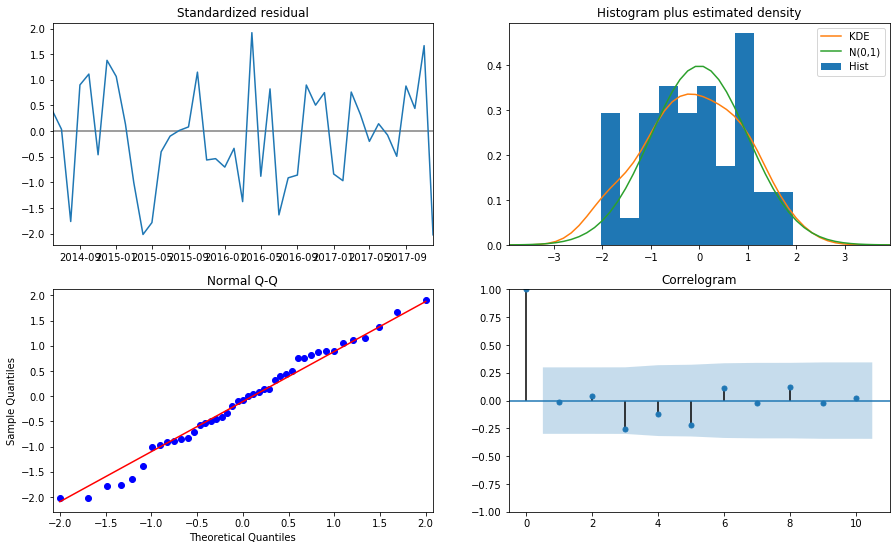

In [65]:
# Call plot_diagnostics() on the results calculated above 
output.plot_diagnostics(figsize=(15, 9))
plt.show()

### from canvas lesson

The purpose here is to ensure that residuals remain uncorrelated, normally distributed having zero mean. In the absence of these assumptions, we can not move forward and need further tweaking of the model.

Checking for these assumptions from diagnostics plots:

* In the top right plot, we see that the red KDE line follows closely with the N(0,1) line (where N(0,1)) is the standard notation for a normal distribution with mean 0 and standard deviation of 1). There is a good indication that the residuals are close to normally distributed.

* The qq-plot on the bottom left shows that the ordered distribution of residuals (blue dots) weakly follows the linear trend of the samples taken from a standard normal distribution with N(0, 1).There is fair indication that the residuals are normally distributed.

* The residuals over time (top left plot) don't display any obvious seasonality and appear to be white noise. This is confirmed by the autocorrelation (i.e. correlogram) plot on the bottom right, which shows that the time series residuals have low correlation with lagged versions of itself.

These observations lead us to conclude that our model has no correlations and provides a satisfactory fit to help forecast future values.

In [66]:
# Get predictions starting from 01-01-1998 and calculate confidence intervals
pred = output.get_prediction(start='2018-01-01', end='2019-06-30',dynamic=False)
# start='2018-01-01', end='2019-06-30'
pred_conf = pred.conf_int()
pred_conf

,lower crime_count,upper crime_count
2018-01-01,615.333759,672.658340
2018-02-01,606.393968,670.729386
2018-03-01,594.327972,665.632909
2018-04-01,593.707152,671.959801
2018-05-01,581.875534,667.059061
2018-06-01,586.994100,679.095521
2018-07-01,594.979325,693.988375
2018-08-01,574.818353,680.726768
2018-09-01,569.163314,681.964328
2018-10-01,585.668021,705.356024


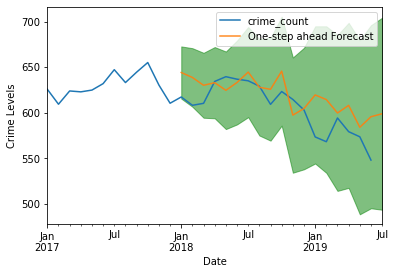

In [67]:
# Plot real vs predicted values along with confidence interval

# rcParams['figure.figsize'] = 15, 6

# Plot observed values
ax = monthly_crime['2017-01-01':].plot(label='observed')

# Plot predicted values
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=0.9)

# Plot the range for confidence intervals
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='g', alpha=0.5)

# Set axes labels
ax.set_xlabel('Date')
ax.set_ylabel('Crime Levels')
plt.legend()

plt.show()

In [68]:
# Get the real and predicted values
Crime_forecasted = pred.predicted_mean
Crime_truth = y_test

# Compute the mean square error
mse = np.sqrt(((Crime_forecasted - Crime_truth)**2).mean())
print('The Root Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Root Mean Squared Error of our forecasts is 24.68


In [69]:
# Get forecast 24 steps ahead in future
prediction = output.get_forecast(steps=24)

# Get confidence intervals of forecasts
pred_conf = prediction.conf_int()

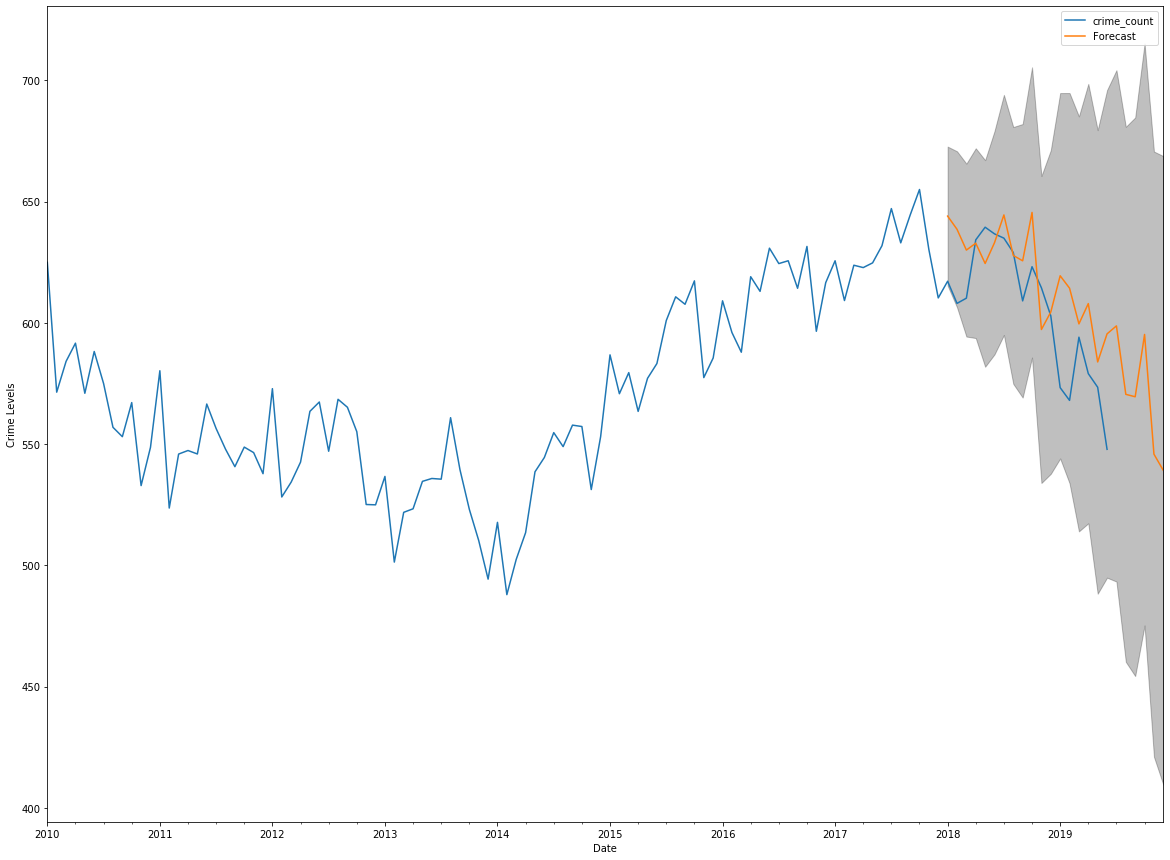

In [70]:
# Plot future predictions with confidence intervals
ax = monthly_crime.plot(label='observed', figsize=(20, 15))
prediction.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_conf.index,
                pred_conf.iloc[:, 0],
                pred_conf.iloc[:, 1], color='k', alpha=0.25)
ax.set_xlabel('Date')
ax.set_ylabel('Crime Levels')

plt.legend()
plt.show()